# Manifold Folding 

Manifold folding is a nonlinear dimensionality reduction technique. 

Depending on what we want, projection might not be best approach to dimensionality reduction. As an example, consider the swiss roll.

(-12, 15)

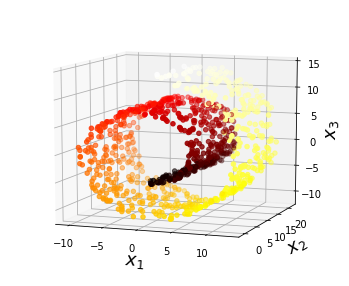

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.datasets import make_swiss_roll


X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

Projection, as done in PCA would create the following.

Text(0, 0.5, '$x_2$')

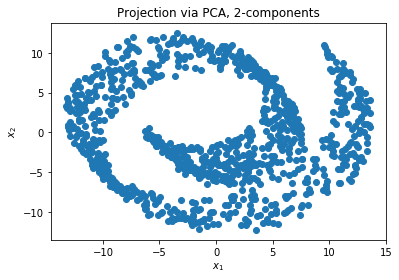

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

plt.scatter(X2D[:, 0], X2D[:, 1])
plt.title('Projection via PCA, 2-components')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

But suppose that we wanted to unfold this roll by removing $x_3$ and projecting onto $x_1$ and $x_2$. The projective form of this technique would result in the rolls to just stack up on top of each other.

The swiss roll is a kind of archetypical dataset and an example of a 2d manifold. More simply a 2d manifold is a 2d shape that can be bent or twisted in higher dimensional shape. In our case, we began with a plane a rolled it up like a carpet.

Empirically most high dimensional datasets have what is called that manifold assumption, that is to say these datasets lie to a closer lower dimesnional manifold. So the goal in manifold learning is to model the manifold that the dataset lies on top of.

Sometimes manifold simplify the machine learning model that could be used on top of it, but this is not always the case. Take for instance in the figure below.

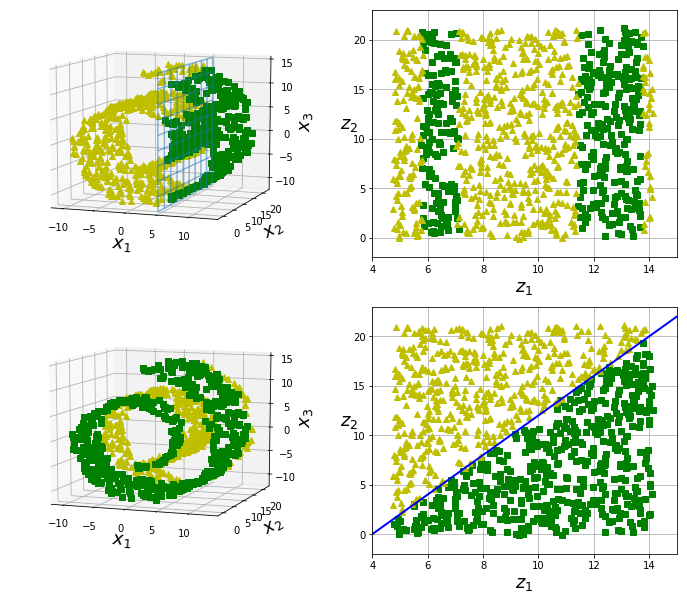

In [4]:
from matplotlib import gridspec
import numpy as np


# x, y, z axis limits
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(221, projection='3d')

# take one dimesion for classification boundary
positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

ax = plt.subplot(222)
# t is the manifold
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

ax = plt.subplot(223, projection='3d')
positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

ax = plt.subplot(224)
plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In the first row, a linear model will do fine without any transformation, but will not on the manifold. On the contrary, and in the second row, we can see how a manifold basis reduction technique makes it use to utilize a linear model.

The main take away is that while dimensionality reduction techniques will reduce the overall training time of the model, they will not nessessarily simplify the model, or make it more performant.

## Locally Linear Embedding (LLE)

LLE is a nonlinear dimensioanlity reduction technique that falls as a manifold learning technique because it does not rely on projections like in PCA.

The LLE reduction technique can be summarized in two steps.

1. Measure how each training instance related to its closest neighbors.
2. Identify a lower dimensionality representation of the training instances where these local relationships are best preserved.

We can show how this technique in particular is well suited for modeling manifolds.

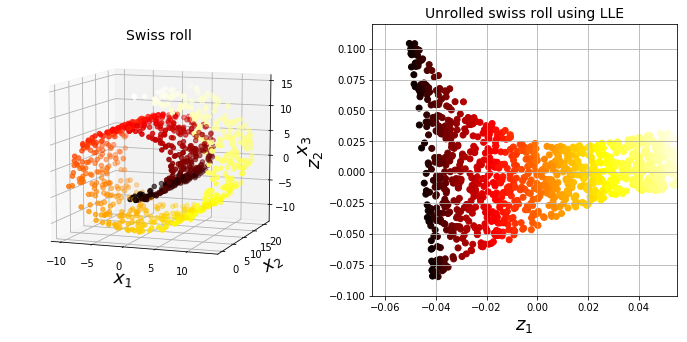

In [11]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding


X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(121, projection='3d')
plt.title("Swiss roll", fontsize=14)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)

plt.subplot(122)
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

We can see that the LLE does a pretty good job of modeling the manifold. We also observe how the local instances are preserved (reds align with red, and yellows align with yellow, just like in the original plot).

## The Algorithm

1. Identify the k closest neighbors (c.n) for each training instances

| X_00 | X_10 | X_20 | . | . | . | X_j0 | = | kcn | = | X_ab | X_cd | X_ef | . | . | . | 
|------|------|------|---|---|---|------|---|-----|---|------|------|------|---|---|---| 
| X_10 | .    | .    | . | . | . | .    | = | kcn | = | .    | .    | .    | . | . | . | 
| X_20 | .    | .    | . | . | . | .    | = | kcn | = | .    | .    | .    | . | . | . | 
| .    | .    | .    | . | . | . | .    | . | .   | . | .    | .    | .    | . | . | . | 
| .    | .    | .    | . | . | . | .    | . | .   | . | .    | .    | .    | . | . | . | 
| .    | .    | .    | . | . | . | .    | . | .   | . | .    | .    | .    | . | . | . | 
| X_i0 | .    | .    | . | . | . | X_ij | = | kcn | = | .    | .    | .    | . | . | . | 



2. Reconstruct each row (instance) as a linear function of all the other samples. In particular, our goal is to find a weight for every one of the k closest neighbors much that when we sum them together we get as close to $x^{(i)}$, (the training instance) as possible.

Generalizing this a bit further, we want to find a weight matrix $W$, which does this for every instance in the data. Mathematically, we will want to find $$\hat{W} = \text{argmin}_W = \sum_{i=1}^m (x^{(i)} - \sum_{j=1}^m w_{i, j} x^{(j)})^2$$

subject under the constraints that

$$
\begin{cases} 
      w_{i, j} = 0 \text{ if } x^{(j)} \text{ is not a closest neighbor of } x^{(i)}\\
      \sum_{i=1}^m w_{i,j} = 1 \text{ for i=1, 2, ... m}
\end{cases}
$$

Lets break this down.

In $\hat{W}$, $x^{(i)}$ is the instance we which were interested in minimizing the weights for. We're interested in doing this for every instance, so the sum for all the instances should be as small as possible. Suppose we had two instances, then our weight matrix $\hat{W}$ becomes:

$$\hat{W} = \text{argmin}_w = (x^{(0)} - w_{0, 1} x^{(1)})^2$$

Since we really only have two samples, the only other instance we can depend on it the other one. Its an oversimplification, for the purposes of explaination, it gets the point across. Our goal here is to find a single weight such that its product with $x^{(1)}$ becomes as small to the original instance $x^{(0)}$. This is a differentible function, and we can use the derivative or gradient descent to quickly find an answer.

For the constraints, we write that $w_{i,j} = 0$ for non closest neighbors. This effectively zeros out the term $\sum_{j=1}^m w_{i, j}$, so we dont have deal with nonlocal instances. Since $x^{(i)}$ is the same for all groups as a result, the relative difference doesn't matter and the arg minimum will remain the same. Finally, the last constraint $\sum_{i=1}^m w_{i,j} = 1$ just normalizes the weights which makes things more readable. 

The intuition here is that we become able to describe each $x^{(i)}$ by using similiar instances around it. And we are able to incapsulate that information into a weight matrix. In the end, our weight matrix looks like this:

| W_00 | W_01 | W_02 | . | . | . | W_0m | 
|------|------|------|---|---|---|------| 
| W_10 | .    | .    | . | . | . | .    | 
| W_20 | .    | .    | . | . | . | .    | 
| .    | .    | .    | . | . | . | .    | 
| .    | .    | .    | . | . | . | .    | 
| .    | .    | .    | . | . | . | .    | 
| W_3m | .    | .    | . | . | . | W_mm | 

An, $m \times m$ ususally sparse matrix that encodes weights for all the training instances. Each row represents a weight vector approximating $x^{(i)}$ as a local instance.


3. The third step and final is take each original instance $x^{(i)}$ which is $m$ dimensional, and map it to $d$ dimensional space using the now discovered weight matrix. Understandably, we want $d < n$ because were doing dimensioanlity reduction after all. We'll call this $d$-dimensionally mapped instances $z^{(i)}$, where $x^{(i)} \mapsto z^{(i)}$.

Each $z^{(i)}$ is a image of $x^{(i)}$ that we want to find. Doing this for every instances builds $\hat{Z}$. To do this, we minimize the squared distance between $z^{(i)}$ and $\sum_{j=1}^m \hat{w}_{i,j}z^{(j)}$. 

$$\hat{Z} = \text{argmin}_Z = \sum_{i=1}^m (z^{(i)} - \sum_{j=1}^m \hat{w}_{i, j} z^{(j)})^2$$

If you notice, this is the same objective function as before, with just $z$ swapped with $x$. We are also operating in reverse. Rather than finding a $W$ weight matrix, we use the previous identified weight matrix $\hat{W}$, and using it to build new coordinates $\hat{Z}$. However, unlike before, this objective function is unconstrained. 

Th general idea is that since the previous weights we found $\hat{w}_{i, j}$ direct local neighbors to approximate original instances, taking those same weights and performing the same in reverse, we create an image of $x^{(i)}$ but in a lower dimensional setting.

## Other Dimensionality Reduction Techniques


### Multidimensional Scaling
Reduces dimensionality while trying to preserve the distances between the instances.

### Isomap
Creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve the _geodesic_ distances between the instances.

### t-Distributed Stochastic Neighbor Embedding (t-SNE) 
Reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space (e.g., to visualize the MNIST images in 2D).

### Linear Discriminant Analysis (LDA)
Is actually a classification algorithm, but during training it learns the most discriminative axes between the classes, and these axes can then be used to define a hyperplane onto which to project the data. The benefit is that the projection will keep classes as far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.